In [ ]:
from google.colab import drive
import zipfile
import os


drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os


zip_file_path ="/content/drive/MyDrive/heartbeat.zip"
extracted_dir_path = './data/extracted_images/'


if not os.path.exists(extracted_dir_path):
    os.makedirs(extracted_dir_path)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Images extracted successfully!")

Images extracted successfully!


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
!pip3 install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2


model = Sequential([

    Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same', input_shape=(X_train_split.shape[1], X_train_split.shape[2], X_train_split.shape[3])),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
##new

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization


mitbih_train = pd.read_csv('/content/data/extracted_images/mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('/content/data/extracted_images/mitbih_test.csv', header=None)
ptbdb_abnormal = pd.read_csv('/content/data/extracted_images/ptbdb_abnormal.csv', header=None)
ptbdb_normal = pd.read_csv('/content/data/extracted_images/ptbdb_normal.csv', header=None)

#combine
ptbdb = pd.concat([ptbdb_abnormal, ptbdb_normal], ignore_index=True)

# shape
print("MIT-BIH Train shape:", mitbih_train.shape)
print("MIT-BIH Test shape:", mitbih_test.shape)
print("PTBDB shape:", ptbdb.shape)

# Split data into features and labels
X_mitbih_train = mitbih_train.iloc[:, :-1].values
y_mitbih_train = mitbih_train.iloc[:, -1].values
X_mitbih_test = mitbih_test.iloc[:, :-1].values
y_mitbih_test = mitbih_test.iloc[:, -1].values
X_ptbdb = ptbdb.iloc[:, :-1].values
y_ptbdb = ptbdb.iloc[:, -1].values


print("MIT-BIH Train class distribution:", np.unique(y_mitbih_train, return_counts=True))
print("MIT-BIH Test class distribution:", np.unique(y_mitbih_test, return_counts=True))
print("PTBDB class distribution:", np.unique(y_ptbdb, return_counts=True))

# Normalize
scaler = StandardScaler()
X_mitbih_train = scaler.fit_transform(X_mitbih_train)
X_mitbih_test = scaler.transform(X_mitbih_test)
X_ptbdb = scaler.fit_transform(X_ptbdb)

# Convert labels to categorical
y_mitbih_train = to_categorical(y_mitbih_train)
y_mitbih_test = to_categorical(y_mitbih_test)
y_ptbdb = to_categorical(y_ptbdb)


MIT-BIH Train shape: (87554, 188)
MIT-BIH Test shape: (21892, 188)
PTBDB shape: (14552, 188)
MIT-BIH Train class distribution: (array([0., 1., 2., 3., 4.]), array([72471,  2223,  5788,   641,  6431]))
MIT-BIH Test class distribution: (array([0., 1., 2., 3., 4.]), array([18118,   556,  1448,   162,  1608]))
PTBDB class distribution: (array([0., 1.]), array([ 4046, 10506]))


In [ ]:

model = Sequential()

# 1st convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_mitbih_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# 2nd convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# 3rd convolutional layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(y_mitbih_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 185, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 185, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 90, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 90, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 43, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 43, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 21, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 21, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 5376)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 256)                 │       1,376,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,503,109 (5.73 MB)

 Trainable params: 1,502,213 (5.73 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
print("X_mitbih_train shape:", X_mitbih_train.shape)
print("y_mitbih_train shape:", y_mitbih_train.shape)


X_mitbih_train shape: (87554, 187, 1)
y_mitbih_train shape: (87554, 5)


In [ ]:
num_classes = y_mitbih_train.shape[1]
print("Number of classes:", num_classes)


Number of classes: 5


In [ ]:

model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Reshape the data for Conv1D
X_mitbih_train = X_mitbih_train.reshape(X_mitbih_train.shape[0], X_mitbih_train.shape[1], 1)
X_mitbih_test = X_mitbih_test.reshape(X_mitbih_test.shape[0], X_mitbih_test.shape[1], 1)
X_ptbdb = X_ptbdb.reshape(X_ptbdb.shape[0], X_ptbdb.shape[1], 1)


In [ ]:
# Convert data types to float32
X_mitbih_train = X_mitbih_train.astype('float32')
X_mitbih_test = X_mitbih_test.astype('float32')
X_ptbdb = X_ptbdb.astype('float32')

# Convert labels to float32
y_mitbih_train = y_mitbih_train.astype('float32')
y_mitbih_test = y_mitbih_test.astype('float32')
y_ptbdb = y_ptbdb.astype('float32')


In [ ]:
#important1

In [ ]:
import numpy as np

def add_noise(data, noise_factor=0.005):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return noisy_data

def time_shift(data, shift_max=2):
    shift = np.random.randint(-shift_max, shift_max)
    return np.roll(data, shift, axis=1)

def scale(data, scale_low=0.9, scale_high=1.1):
    scale_factor = np.random.uniform(scale_low, scale_high)
    return data * scale_factor

# Augment the dataset
X_combined_augmented = np.concatenate([X_combined,
                                       add_noise(X_combined),
                                       time_shift(X_combined),
                                       scale(X_combined)], axis=0)
y_combined_augmented = np.concatenate([y_combined, y_combined, y_combined, y_combined], axis=0)

# Shuffle
shuffle_indices = np.random.permutation(np.arange(X_combined_augmented.shape[0]))
X_combined_augmented = X_combined_augmented[shuffle_indices]
y_combined_augmented = y_combined_augmented[shuffle_indices]


In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_combined.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_combined.shape[1], 1), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_combined_augmented, y_combined_augmented,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.8829 - loss: 0.9484 - val_accuracy: 0.9623 - val_loss: 0.4441
Epoch 2/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - accuracy: 0.9437 - loss: 0.4940 - val_accuracy: 0.9628 - val_loss: 0.4080
Epoch 3/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9473 - loss: 0.4512 - val_accuracy: 0.9678 - val_loss: 0.3602
Epoch 4/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9480 - loss: 0.4137 - val_accuracy: 0.9668 - val_loss: 0.3460
Epoch 5/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9498 - loss: 0.3843 - val_accuracy: 0.9647 - val_loss: 0.3130
Epoch 6/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9499 - loss: 0.3711 - val_accuracy: 0.9721 - val_loss: 0.2856
Epoch 7/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9510 - loss: 0.3551 - val_accuracy: 0.9683 - val_loss: 0.2937
Epoch 8/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.9528 - loss: 0

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_combined.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Test accuracy: 0.6015
Test loss: 1.5248


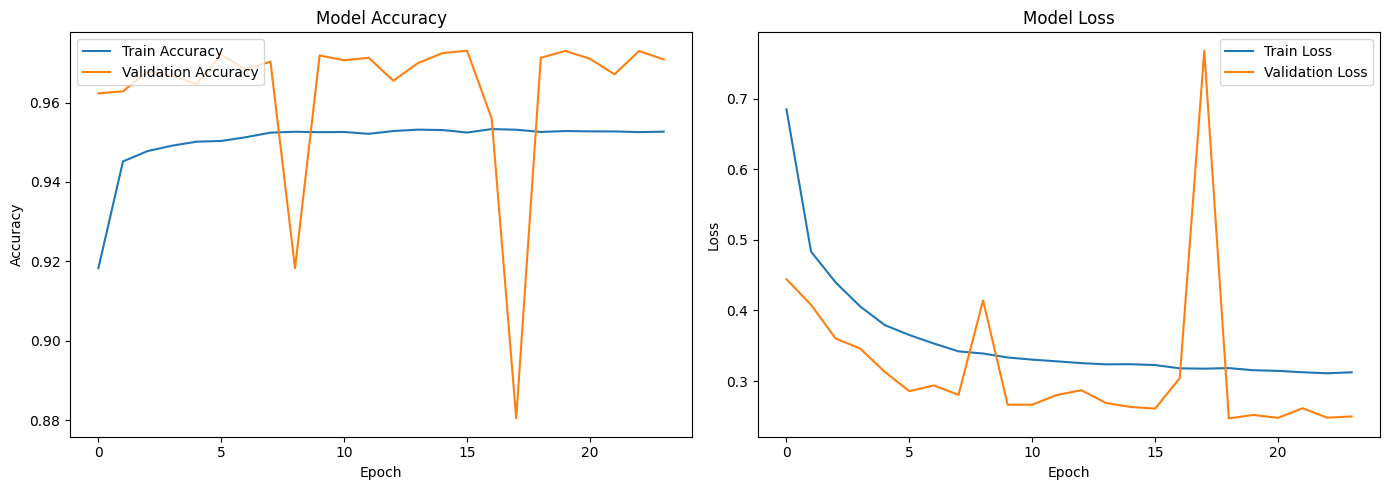

In [ ]:

test_loss, test_acc = model.evaluate(X_mitbih_test, y_mitbih_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 68s 11ms/step - accuracy: 0.5812 - loss: 1.3827 - val_accuracy: 0.8269 - val_loss: 1.0521 - learning_rate: 0.0010
Epoch 2/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 64s 9ms/step - accuracy: 0.7741 - loss: 1.0546 - val_accuracy: 0.8326 - val_loss: 1.0475 - learning_rate: 0.0010
Epoch 3/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8137 - loss: 0.9863 - val_accuracy: 0.8785 - val_loss: 0.9663 - learning_rate: 0.0010
Epoch 4/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8292 - loss: 0.9411 - val_accuracy: 0.8509 - val_loss: 0.9905 - learning_rate: 0.0010
Epoch 5/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.8463 - loss: 0.9147 - val_accuracy: 0.8785 - val_loss: 0.9789 - learning_rate: 0.0010
Epoch 6/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.8495 - loss: 0.9049 - val_accuracy: 0.5541 - val_loss: 2.0398 - learning_rate: 0.0010
Epoch 7/50
5106/5106 ━━━━━━━━━━━━━━━━━━━━ 86s 9ms/step - accuracy: 0.

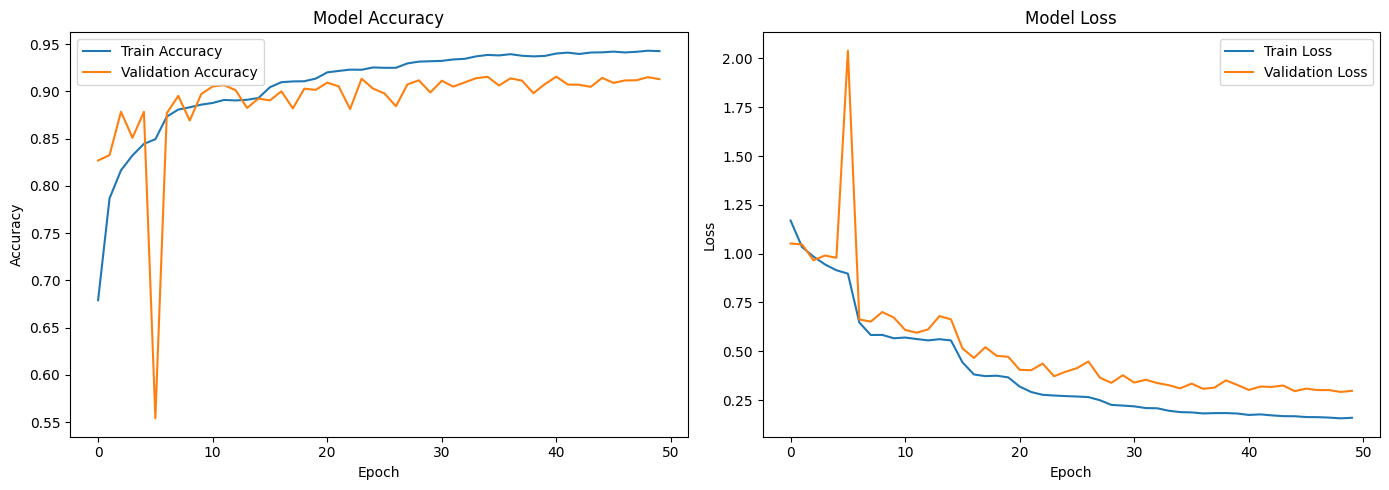

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

# Calculating class weights to handle class imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_combined.argmax(axis=1)),
    y=y_combined.argmax(axis=1)
)
class_weights_dict = dict(enumerate(class_weights))

model = Sequential()
model.add(Conv1D(64, kernel_size=5, padding='same', input_shape=(X_combined.shape[1], 1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv1D(256, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(512, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)


history = model.fit(
    X_combined_augmented, y_combined_augmented,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_mitbih_test, y_mitbih_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:

model.save('ecg_classification_model.h5')


In [ ]:

detailed_class_labels = {
    0: 'Normal beat',
    1: 'Ventricular ectopic beat',
    2: 'Supraventricular ectopic beat',
    3: 'Fusion beat',
    4: 'Unknown or other types'
}


broad_class_labels = {
    'Normal': [0],  #  normal
    'Abnormal': [1, 2, 3, 4]  # All other classes are considered abnormal
}


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
#importa

In [ ]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.models import load_model


model_path = '/content/ecg_classification_model.h5'
model = load_model(model_path)


detailed_class_labels = {
    0: 'Normal beat',
    1: 'Ventricular ectopic beat',
    2: 'Supraventricular ectopic beat',
    3: 'Fusion beat',
    4: 'Unknown or other types'
}


broad_class_labels = {
    'Normal': [0],
    'Abnormal': [1, 2, 3, 4]
}

def preprocess_ecg_signal(signal, num_timesteps=187, num_features=1):
    signal = np.array(signal)

    #  if standard deviation is zero
    std_dev = np.std(signal)
    if std_dev == 0:

        signal = (signal - np.mean(signal))
    else:
        # Normalize the signal
        signal = (signal - np.mean(signal)) / std_dev


    if signal.shape[0] < num_timesteps:
        signal = np.pad(signal, (0, num_timesteps - signal.shape[0]), 'constant')
    elif signal.shape[0] > num_timesteps:
        signal = signal[:num_timesteps]

    signal = signal.reshape((1, num_timesteps, num_features))

    return signal

def classify_ecg_signal(signal, model, detailed_class_labels, broad_class_labels):
    preprocessed_signal = preprocess_ecg_signal(signal)
    predictions = model.predict(preprocessed_signal)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    detailed_label = detailed_class_labels[predicted_class_index]
    broad_label = None
    for label, classes in broad_class_labels.items():
        if predicted_class_index in classes:
            broad_label = label
            break
    return detailed_label, broad_label, predictions


signal_input = widgets.Textarea(
    value='',
    placeholder='Enter ECG signal data, separated by commas',
    description='Signal Data:',
    layout=widgets.Layout(width='100%', height='150px')
)


classify_button = widgets.Button(
    description='Classify ECG Signal'
)


def on_classify_button_clicked(b):
    try:

        signal = list(map(float, signal_input.value.split(',')))

        # Classify the signal data
        detailed_label, broad_label, predictions = classify_ecg_signal(signal, model, detailed_class_labels, broad_class_labels)

        print(f"**Detailed Classification:** {detailed_label}")
        print(f"**Broad Classification:** {broad_label}")
        print(f"**Class Probabilities:** {predictions}")
    except ValueError:
        print("Please enter valid numbers separated by commas.")
    except Exception as e:
        print(f"An error occurred: {e}")


classify_button.on_click(on_classify_button_clicked)


display(signal_input, classify_button)


Textarea(value='', description='Signal Data:', layout=Layout(height='150px', width='100%'), placeholder='Enter…

Button(description='Classify ECG Signal', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
**Detailed Classification:** Supraventricular ectopic beat
**Broad Classification:** Abnormal
**Class Probabilities:** [[0.01297182 0.13646178 0.45014903 0.3950348  0.0053826 ]]
